In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgbm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (15, 8)
plt.rc('axes', axisbelow=True)

In [4]:
# reading data
X_train = pd.read_feather('X_train.f').set_index('sku')
X_val = pd.read_feather('X_val.f').set_index('sku')
y_train = pd.read_feather('y_train.f').set_index('sku').iloc[:, 0]
y_val = pd.read_feather('y_val.f').set_index('sku').iloc[:, 0]
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

X = pd.concat([X_train, X_val], axis=0)
y = pd.concat([y_train, y_val], axis=0)
print(X.shape, y.shape)

(432587, 40) (144196, 40) (432587,) (144196,)
(576783, 40) (576783,)


## Fitting with full data

In [5]:
dtrain = lgbm.Dataset(data=X, label=y)

params = {
    'objective': 'multiclass',
    'num_classes': 30,
    'metric': 'multi_logloss',
    'boosting': 'gbdt',
    'random_seed': 0,
    'deterministic': True,
    'feature_pre_filter': False,
    'lambda_l1': 0.00037397899681396743,
    'lambda_l2': 8.75904356834923,
    'num_leaves': 19,
    'feature_fraction': 0.8,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 25,
    'num_iterations': 140,
    'early_stopping_round': 20
}

# using  train API
model = lgbm.train(
    params,
    dtrain,
    valid_sets=[dtrain]
)

/Users/u004104/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/u004104/Library/Python/3.9/lib/python/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6620
[LightGBM] [Info] Number of data points in the train set: 576783, number of used features: 40
[LightGBM] [Info] Start training from score -3.335481
[LightGBM] [Info] Start training from score -3.311373
[LightGBM] [Info] Start training from score -3.333389
[LightGBM] [Info] Start training from score -3.393586
[LightGBM] [Info] Start training from score -3.465152
[LightGBM] [Info] Start training from score -3.521668
[LightGBM] [Info] Start training from score -3.372694
[LightGBM] [Info] Start training from score -3.278450
[LightGBM] [Info] Start training from score -3.262115
[LightGBM] [Info] Start training from score -3.281537
[LightGBM] [Info] Start training from score -3.359486
[LightGBM] [Info] Start training from score -3.47

## Submission

In [6]:
X_test = pd.read_feather('X_test.f').set_index('sku')
X_test

,sold_quantity_17,sold_quantity_18,sold_quantity_19,sold_quantity_20,sold_quantity_21,sold_quantity_25,sold_quantity_26,sold_quantity_27,sold_quantity_28,sold_quantity_29,sold_quantity_30,minutes_active_29,minutes_active_30,roll_mean_sold_30_11,roll_mean_sold_29_10,roll_mean_sold_28_9,roll_mean_sold_27_8,roll_mean_sold_26_7,roll_mean_sold_25_6,roll_mean_sold_24_5,roll_mean_minutes_30_11,roll_mean_minutes_29_10,roll_mean_minutes_26_7,roll_mean_minutes_25_6,roll_mean_minutes_24_5,roll_mean_price_30_11,roll_mean_price_29_10,roll_mean_price_27_8,roll_mean_price_25_6,roll_mean_price_24_5,roll_sum_zero_sold_30_11,roll_sum_zero_sold_24_5,roll_sum_shipping_logistic_type_fulfillment_30_11,roll_sum_shipping_logistic_type_cross_docking_30_11,roll_sum_shipping_logistic_type_fulfillment_28_9,roll_sum_shipping_logistic_type_fulfillment_26_7,roll_sum_shipping_logistic_type_fulfillment_25_6,roll_sum_shipping_logistic_type_fulfillment_24_5,roll_sum_shipping_payment_free_shipping_28_9,target_stock
sku,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
464801,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,1440.000000,0.20,0.20,0.25,0.25,0.25,0.25,0.25,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,0.002632,0.002632,0.000132,0.000132,0.000132,17.0,16.0,20,0,20,20,20,20,20,3
645793,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1440.0,1440.000000,0.35,0.35,0.40,0.45,0.45,0.45,0.45,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,0.002632,0.002632,0.000132,0.000132,0.000132,14.0,13.0,20,0,20,20,20,20,20,4
99516,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,3.0,5.0,1440.0,1440.000000,1.35,1.20,1.10,1.00,0.90,1.05,1.00,1140.365167,1140.365167,1140.365167,1140.365167,1140.365167,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,11.0,12,0,12,12,12,12,0,8
538100,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,4.0,1440.0,1440.000000,0.85,0.80,0.65,0.60,0.55,0.60,0.55,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,12.0,20,0,20,20,20,20,0,8
557191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1440.0,1440.000000,0.10,0.00,0.00,0.00,0.10,0.10,0.10,492.347523,420.347523,251.295680,251.295680,251.295680,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,19.0,20,0,20,20,20,20,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,267.710767,0.00,NaN,NaN,NaN,NaN,NaN,NaN,267.710767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,0,0,0,8
6707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,266.083333,0.00,NaN,NaN,NaN,NaN,NaN,NaN,266.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,1,0,0,0,0,0,30
170355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.252633,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.252633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,0,0,0,3


In [7]:
# how many NAs 
X_test.isnull().sum()

sold_quantity_17                                       6673
sold_quantity_18                                       6006
sold_quantity_19                                       5673
sold_quantity_20                                       5467
sold_quantity_21                                       4660
sold_quantity_25                                       2039
sold_quantity_26                                       1812
sold_quantity_27                                       1655
sold_quantity_28                                       1110
sold_quantity_29                                        552
sold_quantity_30                                          0
minutes_active_29                                       552
minutes_active_30                                         0
roll_mean_sold_30_11                                      0
roll_mean_sold_29_10                                    552
roll_mean_sold_28_9                                    1110
roll_mean_sold_27_8                     

In [8]:
%%time

# predictions using trained model
final_y_pred_lgbmclassifier = model.predict(X_test)

CPU times: user 5min 31s, sys: 1.3 s, total: 5min 32s
Wall time: 1min 30s


In [9]:
final_y_pred_lgbmclassifier

array([[0.00640292, 0.01697926, 0.02511093, ..., 0.01123986, 0.00713356,
        0.00485469],
       [0.00629071, 0.01586149, 0.0242455 , ..., 0.00733417, 0.00785728,
        0.00378857],
       [0.05549464, 0.21587487, 0.20591817, ..., 0.00157142, 0.00148715,
        0.00128338],
       ...,
       [0.0010831 , 0.00338852, 0.0039674 , ..., 0.0613011 , 0.05381288,
        0.04400054],
       [0.01011786, 0.05707781, 0.03495134, ..., 0.02852897, 0.02299985,
        0.02395635],
       [0.00069354, 0.00416107, 0.00348822, ..., 0.06821417, 0.04252595,
        0.05135339]])

In [10]:
final_y_pred_lgbmclassifier.shape

(551472, 30)

## Creating DataFrame with predictions

In [11]:
%%time

X_test_sub = pd.DataFrame(final_y_pred_lgbmclassifier, columns=range(1, 31))
X_test_sub

CPU times: user 633 µs, sys: 28 µs, total: 661 µs
Wall time: 275 µs


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.006403,0.016979,0.025111,0.038175,0.035647,0.043938,0.058638,0.058634,0.057562,0.059860,0.050175,0.043200,0.041733,0.050516,0.055515,0.043168,0.043272,0.037138,0.030776,0.029659,0.028941,0.028061,0.025670,0.022719,0.021139,0.013974,0.010169,0.011240,0.007134,0.004855
1,0.006291,0.015861,0.024245,0.037582,0.041611,0.062469,0.064099,0.061151,0.056176,0.059586,0.048587,0.043350,0.039871,0.046488,0.048986,0.044774,0.042711,0.036711,0.027678,0.033434,0.023511,0.025877,0.022522,0.015574,0.023109,0.015417,0.013349,0.007334,0.007857,0.003789
2,0.055495,0.215875,0.205918,0.181884,0.070685,0.052972,0.037150,0.036816,0.025321,0.016729,0.013050,0.013905,0.008330,0.009214,0.010098,0.006172,0.005627,0.003809,0.003158,0.004894,0.003868,0.002952,0.002827,0.002862,0.002553,0.001828,0.001667,0.001571,0.001487,0.001283
3,0.015946,0.044926,0.107212,0.097261,0.095431,0.052759,0.057179,0.067378,0.054274,0.049435,0.037617,0.038007,0.033158,0.038667,0.034702,0.022047,0.027615,0.020440,0.012347,0.014531,0.014286,0.010212,0.010811,0.010721,0.007228,0.007182,0.005316,0.006958,0.004061,0.002295
4,0.002997,0.009898,0.013992,0.020623,0.030604,0.031060,0.054492,0.049140,0.046011,0.042867,0.040983,0.034365,0.040679,0.044246,0.049684,0.048940,0.048835,0.037086,0.031038,0.037553,0.039514,0.041942,0.042648,0.030329,0.028092,0.028727,0.022893,0.023500,0.015841,0.011421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,0.000779,0.005064,0.003305,0.005975,0.010550,0.007449,0.013837,0.008428,0.026184,0.025577,0.023361,0.026936,0.031916,0.033980,0.034947,0.029995,0.046534,0.046800,0.029091,0.035572,0.044929,0.052306,0.058583,0.068770,0.069720,0.055816,0.039620,0.066420,0.057744,0.039813
551468,0.000410,0.002976,0.002378,0.008747,0.006165,0.007361,0.010117,0.007605,0.033705,0.025253,0.021160,0.027019,0.025970,0.035868,0.033366,0.030202,0.042408,0.045665,0.028660,0.040338,0.051964,0.047339,0.058241,0.072973,0.081586,0.051150,0.038877,0.072336,0.043991,0.046172
551469,0.001083,0.003389,0.003967,0.007225,0.021208,0.010460,0.018841,0.014543,0.040633,0.028156,0.027727,0.026978,0.028294,0.037245,0.034760,0.029718,0.054968,0.043930,0.035509,0.048229,0.027461,0.041042,0.044777,0.059561,0.076283,0.036879,0.038022,0.061301,0.053813,0.044001
551470,0.010118,0.057078,0.034951,0.017848,0.056052,0.032704,0.057063,0.024072,0.070098,0.035503,0.030570,0.029746,0.030141,0.037367,0.030401,0.025462,0.064755,0.034760,0.029196,0.022636,0.017830,0.034333,0.024675,0.034351,0.037704,0.030024,0.015077,0.028529,0.023000,0.023956


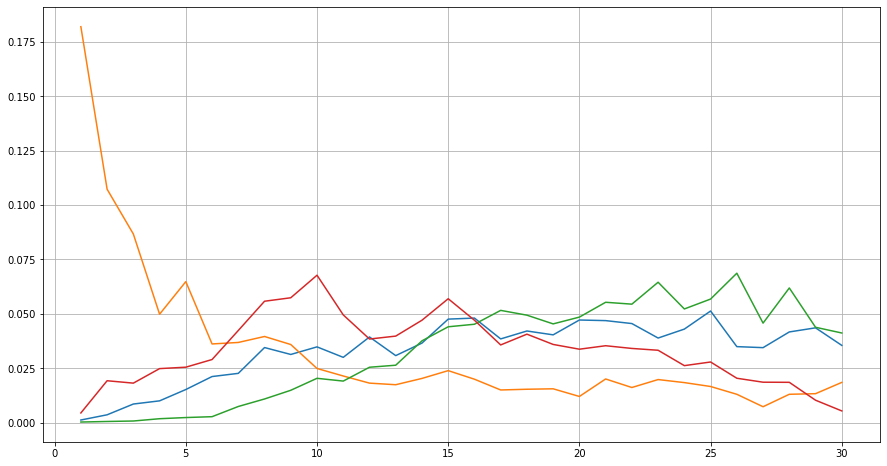

In [22]:
# check probabilites for random skus
for _ in range(1, 5):
    random_sku = X_test_sub.sample(1)
    plt.plot(range(1, 31), random_sku.values.squeeze())
plt.grid();

In [23]:
X_test_sub.sum(axis=1).value_counts().sort_index()

1.0         1
1.0         1
1.0         8
1.0        39
1.0       144
1.0       670
1.0      2516
1.0      8989
1.0     25512
1.0     64182
1.0    103532
1.0    198489
1.0    124550
1.0     21003
1.0      1716
1.0       113
1.0         7
dtype: int64

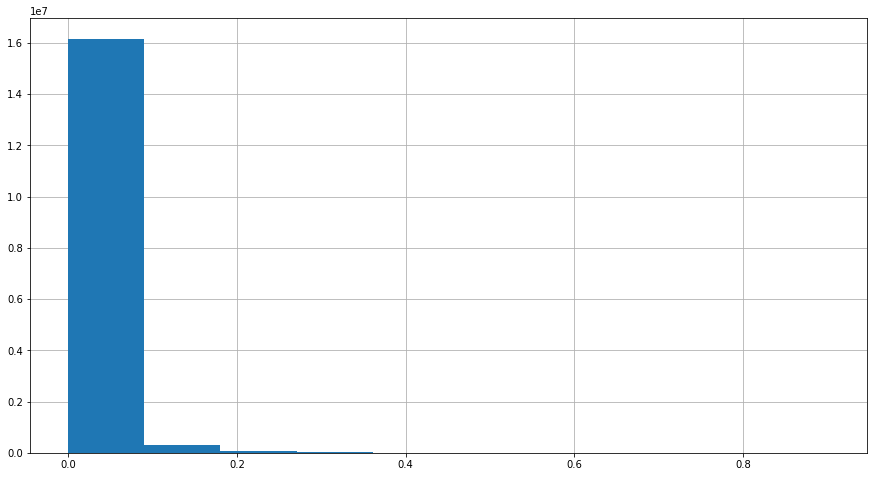

In [24]:
plt.hist(X_test_sub.values.reshape(-1))
plt.grid();

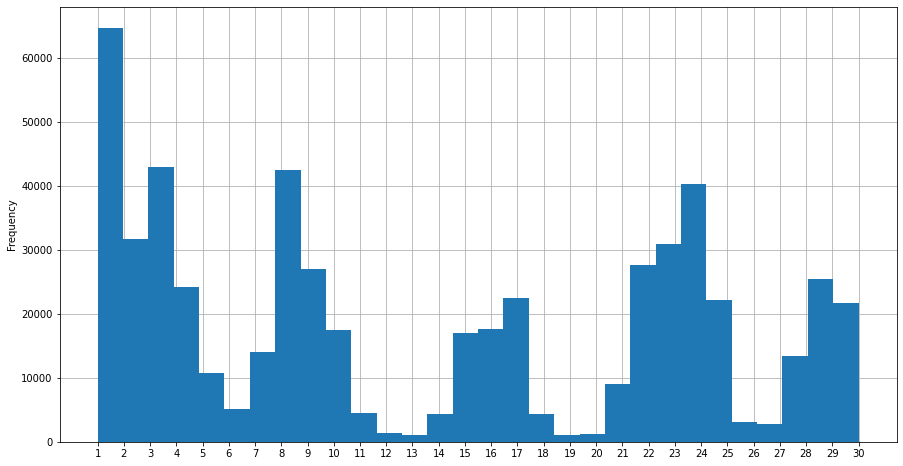

In [25]:
X_test_sub.idxmax(axis=1).plot.hist(bins=30)
plt.xticks(range(1, 31))
plt.grid();

In [26]:
X_test_sub.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000,551472.000000
mean,0.045812,0.043860,0.041164,0.037501,0.034188,0.031698,0.036194,0.039088,0.039042,0.037966,0.034678,0.030784,0.029084,0.035572,0.038058,0.036982,0.036587,0.032772,0.029317,0.027686,0.032954,0.033741,0.033561,0.033039,0.030119,0.025375,0.023409,0.025939,0.024514,0.019318
std,0.104558,0.064881,0.046859,0.035015,0.027019,0.021491,0.021066,0.019825,0.016703,0.015040,0.012505,0.011305,0.010221,0.012583,0.014345,0.015179,0.016060,0.015533,0.014483,0.014716,0.017711,0.019633,0.020223,0.021264,0.020633,0.018566,0.017872,0.020493,0.021465,0.019915
min,0.000030,0.000096,0.000165,0.000218,0.000413,0.000416,0.000892,0.001050,0.000797,0.000737,0.000449,0.000279,0.000240,0.000191,0.000260,0.000212,0.000216,0.000098,0.000104,0.000071,0.000104,0.000106,0.000089,0.000082,0.000062,0.000041,0.000051,0.000072,0.000056,0.000037
25%,0.000920,0.002918,0.004906,0.007697,0.010250,0.012829,0.018051,0.023173,0.026071,0.026880,0.025853,0.023395,0.023257,0.029545,0.030319,0.027782,0.024846,0.019932,0.016358,0.014283,0.016258,0.014830,0.013988,0.011964,0.009944,0.007413,0.006978,0.006955,0.006004,0.004074
50%,0.003276,0.010211,0.017283,0.023673,0.026555,0.027100,0.032798,0.037144,0.037636,0.036663,0.035196,0.031558,0.030359,0.037722,0.041070,0.040623,0.040966,0.036904,0.032990,0.029746,0.035640,0.036326,0.035224,0.034137,0.028698,0.023132,0.019912,0.021341,0.017146,0.010677
75%,0.025835,0.059094,0.074527,0.067363,0.055434,0.048613,0.053663,0.055510,0.052828,0.050752,0.044353,0.038764,0.036328,0.044437,0.048681,0.048739,0.048963,0.045058,0.041031,0.040153,0.048506,0.050731,0.051275,0.050594,0.047493,0.039983,0.037135,0.042149,0.040214,0.031116
max,0.901815,0.574803,0.400730,0.320448,0.295917,0.240385,0.204697,0.269069,0.241228,0.194516,0.168074,0.160848,0.190705,0.231175,0.162557,0.183776,0.153396,0.196856,0.154227,0.163988,0.146210,0.319289,0.174582,0.214812,0.236777,0.227591,0.270486,0.231941,0.212018,0.211567


In [17]:
%%time

X_test_sub.to_csv(
    '2-tuned-lgbm.csv.gz',
    compression='gzip',
    index=False,
    header=False
)

CPU times: user 1min 42s, sys: 766 ms, total: 1min 43s
Wall time: 1min 43s
